[View in Colaboratory](https://colab.research.google.com/github/malinenimaurya/Deep-Learning/blob/master/CNN_1.ipynb)

In [53]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
tf.set_random_seed(0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
#Initialisation
W1 = tf.Variable(tf.truncated_normal([5, 5, 1, 4], stddev=0.1))
B1 = tf.Variable(tf.ones([4])/10)
W2 = tf.Variable(tf.truncated_normal([5, 5, 4, 8], stddev=0.1))
B2 = tf.Variable(tf.ones([8])/10)
W3 = tf.Variable(tf.truncated_normal([4, 4, 8, 12], stddev=0.1))
B3 = tf.Variable(tf.ones([12])/10)
W4 = tf.Variable(tf.truncated_normal([7 * 7 * 12, 200], stddev=0.1))
B4 = tf.Variable(tf.ones([200])/10)
W5 = tf.Variable(tf.truncated_normal([200, 10], stddev=0.1))
B5 = tf.Variable(tf.ones([10])/10)

X = tf.placeholder(tf.float32, [None, 28, 28, 1])

# correct answers will go here
Y_ = tf.placeholder(tf.float32, [None, 10])


In [0]:
# The model
stride = 1  # output is 28x28
Y1 = tf.nn.relu(tf.nn.conv2d(X, W1, strides=[1, stride, stride, 1], padding='SAME') + B1)
stride = 2  # output is 14x14
Y2 = tf.nn.relu(tf.nn.conv2d(Y1, W2, strides=[1, stride, stride, 1], padding='SAME') + B2)
stride = 2  # output is 7x7
Y3 = tf.nn.relu(tf.nn.conv2d(Y2, W3, strides=[1, stride, stride, 1], padding='SAME') + B3)

# reshape the output from the third convolution for the fully connected layer
YY = tf.reshape(Y3, shape=[-1, 7 * 7 * 12])

Y4 = tf.nn.relu(tf.matmul(YY, W4) + B4)
Ylogits = tf.matmul(Y4, W5) + B5
Y = tf.nn.softmax(Ylogits)

# loss function
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=Ylogits, labels=Y_)
cross_entropy = tf.reduce_mean(cross_entropy)*100

# accuracy of the model
is_correct = tf.equal(tf.argmax(Y,1), tf.argmax(Y_,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [0]:
optimizer = tf.train.AdamOptimizer(0.003)         #can use RMSprop, Adadelta, gradientdescent etc
train_step = optimizer.minimize(cross_entropy)

In [57]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
accuracy_history = []
for i in range(500):
    # load batch of images and correct answers
    batch_X, batch_Y = mnist.train.next_batch(100)
    batch_X = np.reshape(batch_X, (-1, 28, 28, 1))
    train_data={X: batch_X, Y_: batch_Y}

    # train
    sess.run(train_step, feed_dict=train_data)
    if i%50 == 0:
      a,c = sess.run([accuracy, cross_entropy], feed_dict=train_data)
      accuracy_history.append(a)
      print("iteration:"+ str(i) + ", accuracy:" + str(a) +", cross_entropy:"+ str(c))

iteration:0, accuracy:0.15, cross_entropy:221.53511
iteration:50, accuracy:0.92, cross_entropy:24.191483
iteration:100, accuracy:0.96, cross_entropy:12.811345
iteration:150, accuracy:0.96, cross_entropy:11.856065
iteration:200, accuracy:0.97, cross_entropy:9.211962
iteration:250, accuracy:0.97, cross_entropy:11.533002
iteration:300, accuracy:0.95, cross_entropy:9.384922
iteration:350, accuracy:0.99, cross_entropy:4.409821
iteration:400, accuracy:0.98, cross_entropy:8.242412
iteration:450, accuracy:0.99, cross_entropy:3.2830899


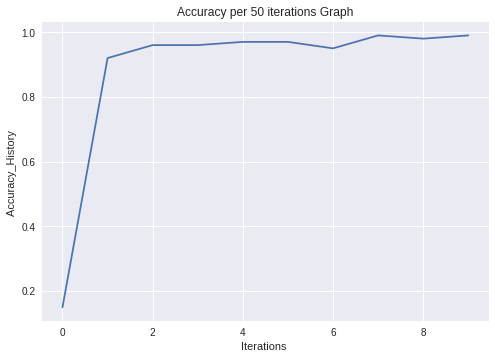

In [58]:
plt.plot(range(len(accuracy_history)), accuracy_history)
plt.xlabel('Iterations ')
plt.ylabel('Accuracy_History ')
plt.title("Accuracy per 50 iterations Graph")
plt.show()

In [59]:
a,c = sess.run([accuracy, cross_entropy], feed_dict=train_data)
print(a,c)

0.98 6.3180404


In [0]:
test_data={X: mnist.test.images, Y_: mnist.test.labels}
test_data[X] = np.reshape(test_data[X], (-1, 28, 28, 1))
a,c = sess.run([accuracy, cross_entropy], feed_dict=test_data)


In [61]:
print(a,c)

0.9782 6.848772
